# IMPORT

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
# Load data
df = pd.read_csv("spam.csv", encoding='latin-1')

# Tampilkan beberapa data
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# DATA PROSES

In [18]:
# Mengganti nama kolom
df = df.rename(columns={"v1": "label", "v2": "pesan"})

# Menghapus kolom yang tidak diperlukan
df = df[['label', 'pesan']]

# Membersihkan teks
df['pesan'] = df['pesan'].str.lower()
df['pesan'] = df['pesan'].str.replace('[^\w\s]', '', regex=True)

# Menambahkan kolom untuk panjang setiap pesan
df['panjang_pesan'] = df['pesan'].apply(len)

# Membagi data menjadi set pelatihan dan pengujian
pesan_train, pesan_test, label_train, label_test = train_test_split(df['pesan'], df['label'], test_size=0.2, random_state=42)

# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pesan_train)
pesan_train_seq = tokenizer.texts_to_sequences(pesan_train)
pesan_test_seq = tokenizer.texts_to_sequences(pesan_test)

# Padding sequences agar memiliki panjang yang sama
maxlen = 100
pesan_train_seq_pad = pad_sequences(pesan_train_seq, maxlen=maxlen, padding='post')
pesan_test_seq_pad = pad_sequences(pesan_test_seq, maxlen=maxlen, padding='post')


# OPERASI

## EKSPLORASI DATA

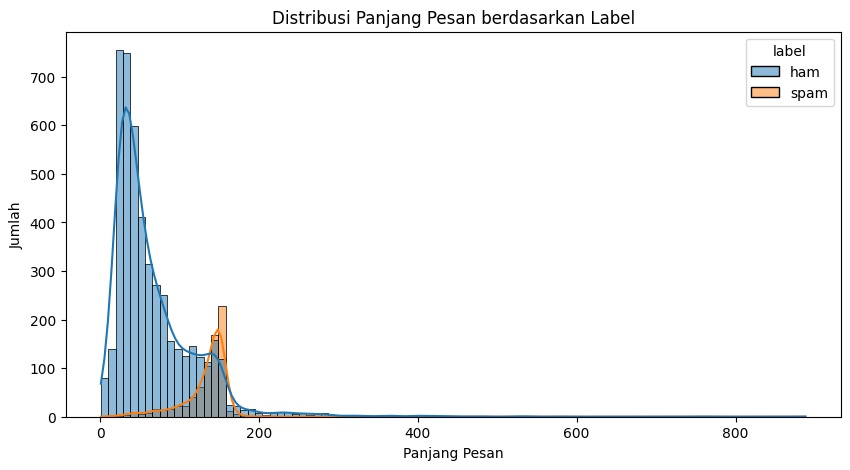

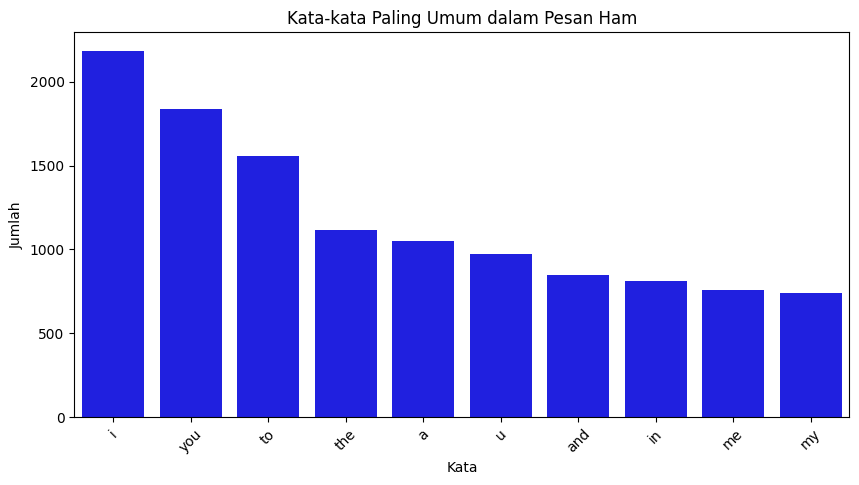

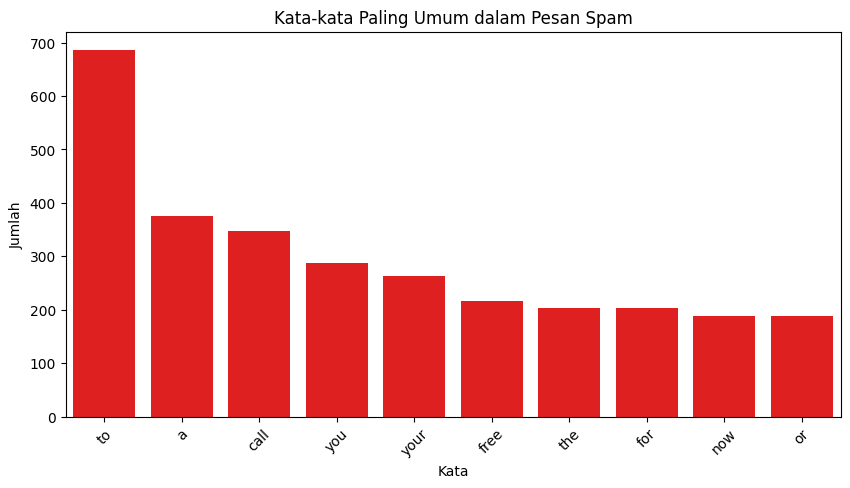

In [19]:
# Plot distribusi panjang pesan
plt.figure(figsize=(10, 5))
sns.histplot(df, x='panjang_pesan', hue='label', kde=True)
plt.xlabel('Panjang Pesan')
plt.ylabel('Jumlah')
plt.title('Distribusi Panjang Pesan berdasarkan Label')
plt.show()

# Analisis kata-kata yang paling umum
from collections import Counter
ham_words = Counter(" ".join(df[df['label']=='ham']['pesan']).split())
spam_words = Counter(" ".join(df[df['label']=='spam']['pesan']).split())

ham_common_words = ham_words.most_common(10)
spam_common_words = spam_words.most_common(10)

# Plot kata-kata paling umum dalam pesan ham
ham_df = pd.DataFrame(ham_common_words, columns=['kata', 'jumlah'])
plt.figure(figsize=(10, 5))
sns.barplot(data=ham_df, x='kata', y='jumlah', color='blue')
plt.title('Kata-kata Paling Umum dalam Pesan Ham')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# Plot kata-kata paling umum dalam pesan spam
spam_df = pd.DataFrame(spam_common_words, columns=['kata', 'jumlah'])
plt.figure(figsize=(10, 5))
sns.barplot(data=spam_df, x='kata', y='jumlah', color='red')
plt.title('Kata-kata Paling Umum dalam Pesan Spam')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


## RNN DAN LSTM TRAINING

In [21]:
# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]  # SELEKSI HANYA TEXT DAN LABEL
df.columns = ['label', 'text']

# PERISAPAN
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
X = df['text']
y = df['label']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)  # padding sequences agar punya ukuran yang sama

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluasi
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # ubah probabilities ke kelas

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/5
70/70 [==============================] - 18s 209ms/step - loss: 0.2775 - accuracy: 0.9073 - val_loss: 0.0940 - val_accuracy: 0.9740
Epoch 2/5
70/70 [==============================] - 11s 149ms/step - loss: 0.0405 - accuracy: 0.9897 - val_loss: 0.0553 - val_accuracy: 0.9848
Epoch 3/5
70/70 [==============================] - 14s 197ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0494 - val_accuracy: 0.9839
Epoch 4/5
70/70 [==============================] - 12s 173ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0470 - val_accuracy: 0.9892
Epoch 5/5
35/35 [==============================] - 2s 33ms/step
Accuracy: 0.9721973094170404
Precision: 0.847953216374269
Recall: 0.9666666666666667
F1 Score: 0.9034267912772586


35/35 [==============================] - 1s 21ms/step
Accuracy: 0.9721973094170404
Precision: 0.847953216374269
Recall: 0.9666666666666667
F1 Score: 0.9034267912772586
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       965
           1       0.85      0.97      0.90       150

    accuracy                           0.97      1115
   macro avg       0.92      0.97      0.94      1115
weighted avg       0.97      0.97      0.97      1115



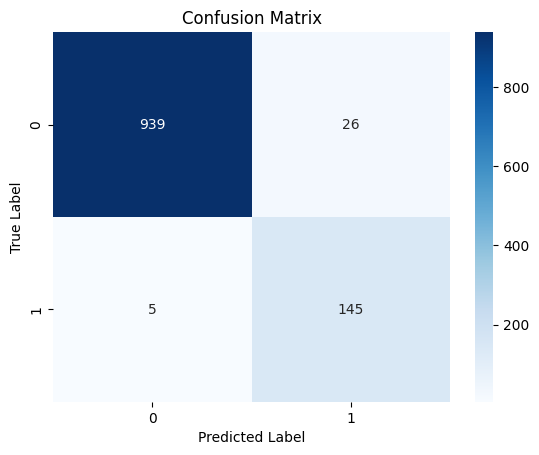

In [22]:
# Evaluasi
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # ubah probabilities ke kelas

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [10]:
# Menyimpan model ke file
model.save('spam_classifier_rnn.h5')


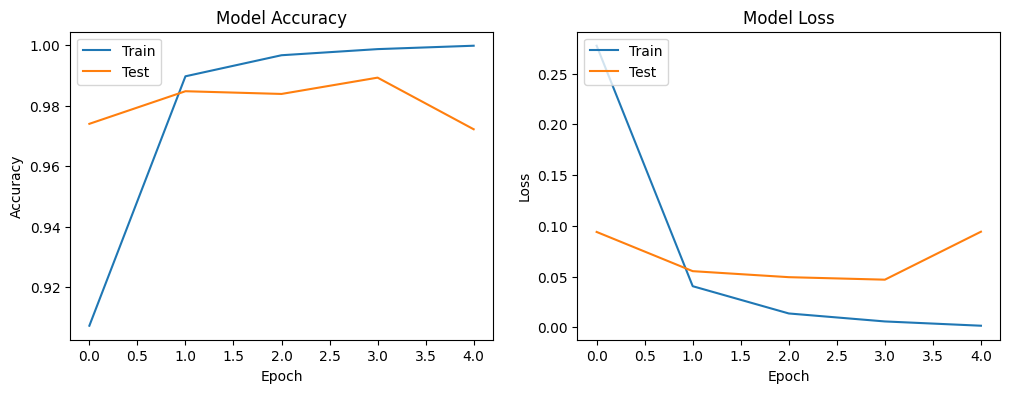

In [23]:
# Plot nilai akurasi pelatihan & validasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot nilai loss pelatihan & validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


## TAMPILKAN JUMLAH SPAM DAN HAM

In [24]:
df.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [25]:
# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
names = df['v1'].value_counts()
names_column = df['v1']

print("Names and their counts:")
print(names)

print("\nNames column:")
print(names_column)

Names and their counts:
v1
ham     4825
spam     747
Name: count, dtype: int64

Names column:
0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object


## DIAGRAM BATANG SPAM DAN HAM

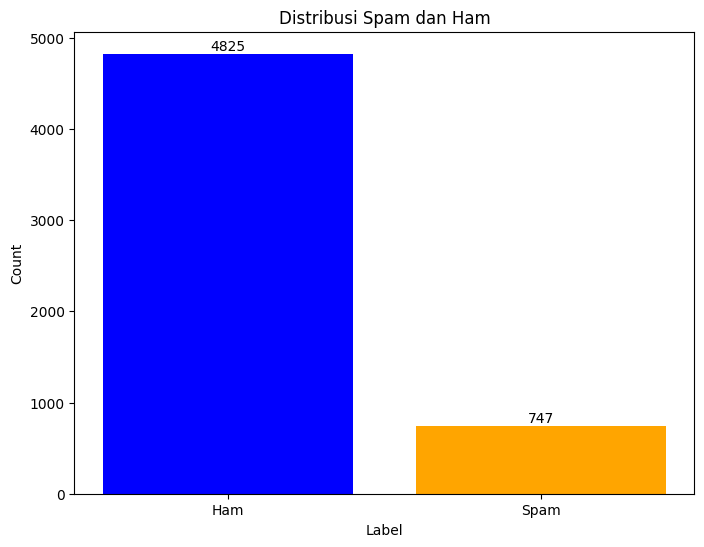

In [26]:
# JUMLAH SPAM DAN HAM
perbandingan_spam = df['v1'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(perbandingan_spam.index, perbandingan_spam.values, color=['blue', 'orange'])

# angka di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribusi Spam dan Ham')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()


## DIAGRAM GARIS HAM DAN SPAM

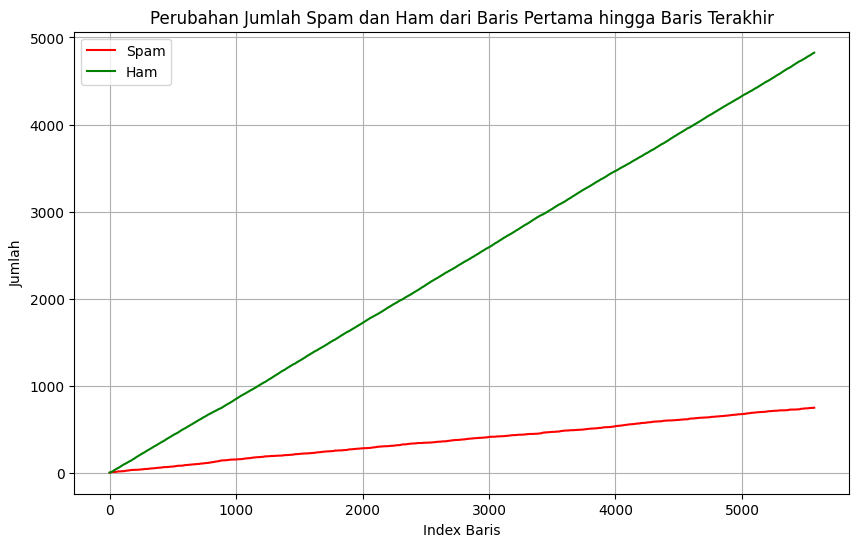

In [27]:
# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Menghitung kumulatif jumlah spam dan ham dari baris pertama hingga baris ke-i
cumulative_spam = (df['v1'] == 'spam').cumsum()
cumulative_ham = (df['v1'] == 'ham').cumsum()

# Plot diagram garis
plt.figure(figsize=(10, 6))
plt.plot(cumulative_spam, label='Spam', color='red')
plt.plot(cumulative_ham, label='Ham', color='green')

plt.xlabel('Index Baris')
plt.ylabel('Jumlah')
plt.title('Perubahan Jumlah Spam dan Ham dari Baris Pertama hingga Baris Terakhir')
plt.legend()
plt.grid(True)
plt.show()

## PRESENTASE HAM DAN SPAM DARI 100%

In [28]:
# Menghitung jumlah total ham dan spam
total_ham = (df['v1'] == 'ham').sum()
total_spam = (df['v1'] == 'spam').sum()

# Menghitung presentase ham dan spam dari total 100%
percentage_ham = (total_ham / len(df)) * 100
percentage_spam = (total_spam / len(df)) * 100

print("Presentase Ham: {:.2f}%".format(percentage_ham))
print("Presentase Spam: {:.2f}%".format(percentage_spam))


Presentase Ham: 86.59%
Presentase Spam: 13.41%


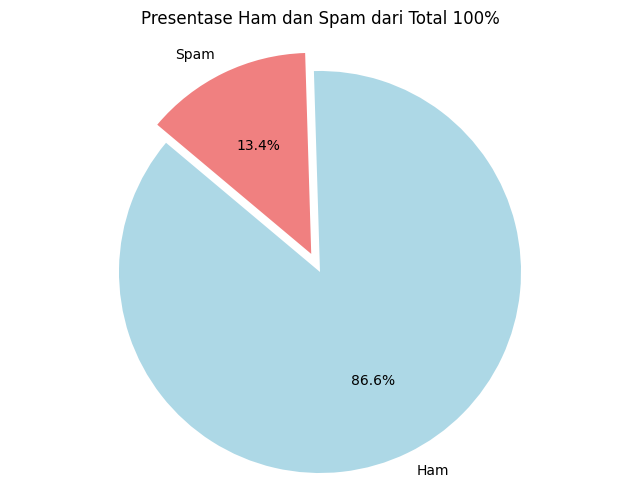

In [29]:
# Label dan nilai untuk diagram lingkaran
labels = ['Ham', 'Spam']
sizes = [percentage_ham, percentage_spam]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # "Meledakkan" potongan yang mewakili "ham"

# Plot diagram lingkaran
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Presentase Ham dan Spam dari Total 100%')
plt.axis('equal')  # Membuat lingkaran terlihat sempurna
plt.show()